# Basic Custom Units, Index, Spectra

### Objective

This will show you how to create a simple, custom unit system and apply it to a skspec Spectra.  For designing your own unit-conversion system (ie.* ft --> in --> cm*), see the related [custom unit system tutorial](http://nbviewer.ipython.org/github/hugadams/skspec/blob/master/examples/Notebooks/units.ipynb).

### Environment Setup

Configure notebook style (see NBCONFIG.ipynb), add imports and paths.  The **%run** magic used below <font color='red'>**requires IPython 2.0 or higher.**</font>

In [1]:
%run NBCONFIG.ipynb

Populating the interactive namespace from numpy and matplotlib
['dti', 'd', 'h', 'm', 'us', 's', 'ms', 'intvl', 'ns']


### A Basic Unit

In spectroscopy, there are so many interesting research projects going on that we knew our Spectra and TimeSpectra objects would only be useful to a small subset of users.  Therefore, we made it really easy to apply your own units to a skspec object and have it persist through subsequent operations.  Our only constraint is that your unit needs to be a subclass of our `Unit` class.  This will ensure consistency in plotting, serialization and so on... 

**Let's create a unit that might correspond to the polarization angle of a beam:**

In [2]:
from skspec.units import Unit

polarization = Unit(
                    short = 'polar',
                    full = 'Polarization',
                    symbol = r'$\theta$',
                      )

The required attributes of a `Unit` are:
  
  - `short`: Symbolic description, like 'm' for 'meter'
  - `full`: Full word, like 'meter'
  - `symbol`: Used in some plotting functions to represent the data type.  
    
The symbol is the least important, and right now is only used in correlation spectroscopy plots.  For example, a cross-plot of polarization and wavelength would have symbols,  $\theta$ vs. $\lambda$.  The "r" in front of the string means raw-literal and prevents python from reading the \t in \theta as a tab.  

#### Plot random noise: wavelength vs. polarization

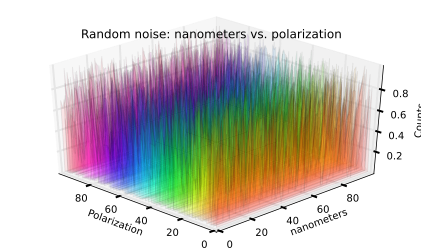

In [3]:
from skspec import Spectra

s = Spectra(np.random.rand(100,100)) #Some random noise
s.specunit = 'nm'
s.varunit = polarization
s.plot(kind='waterfall', cmap='hsv');  #3d Plot
plt.title('Random noise: nanometers vs. polarization');

We've assigned the polarization to our perturbation variable (varunit), which overwrites the columns of the spectra. 

In [4]:
print 'Perturbation short: "%s"\nPerturbation full: "%s"' % (s.varunit, s.full_varunit)
print s.columns[0:6]

Perturbation short: "polar"
Perturbation full: "Polarization"
CustomIndex[polar]([0, 1, 2, 3, 4, 5], dtype='int64')


#### The unit can be accessed on the index:

In [5]:
print s.columns.unit

#### The Unit can store arbitrary attributes that persist through Spectra operations

In [6]:
s.columns.unit.foo = 'FOOSTRING'

squared = s**2

squared.columns.unit.foo

'FOOSTRING'

These could have also been set when initiating `Unit`; that is, `Unit(short='polar', foo='FOOSTRING')`

### Which types of Spectra can I customize?

Certain spectra are **strictly typed**.  For example the `TimeSpectra` will assume your data is time vs. wavelength, and auto-convert accordingly.  In terms of Indexes, this requires: 

   - `TimeSpectra`: columns is **TimeIndex**, index is **SpecIndex**.
    
The `Spectra` only types your row data.  You can have any type of column index (time, pressure, polarization etc...)

   - `Spectra`: columns is **ANY**, index is **SpecIndex**
   
The `AnyFrame` types neither index nor columns:
   
   - `AnyFrame`: columns is **ANY**, index is **ANY**

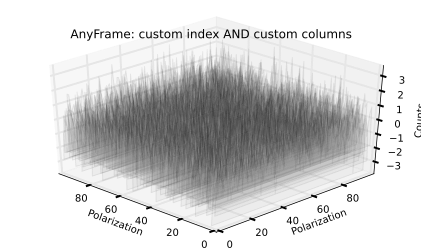

In [7]:
from skspec import AnyFrame

anyframe = AnyFrame(np.random.randn(100,100))  
anyframe.specunit = polarization
anyframe.varunit = polarization
anyframe.plot(kind='waterfall')
plt.title('AnyFrame: custom index AND custom columns');

#### Really, you can overwrite/create the type of any Spectra

`AnyFrame` is simply a convenience, but imagine you want to create a TimeByTime object where the rows and columns are both a `TimeIndex`, strictly.  All you have to do is:  

In [8]:
from skspec.core.timeindex import TimeIndex

class TimeByTime(Spectra):
    """ Demo class that enforces PressureIndex as Index and TimeIndex as columns"""
    def __init__(self, *dfargs, **dfkwargs):
        dfkwargs['strict_index'] = TimeIndex           
        dfkwargs['strict_columns'] =  TimeIndex
        super(Spectra, self).__init__(*dfargs, **dfkwargs)        

You can also overwrite the typeing of pre-existing objects through the private API attributes `_strict_index/columns`.  EG `spectra._strict_index = False`, but please don't do this as this won't trigger any internal changes to the current indexes on the object.  Just make a new class as shown in the prior cell.

<hr>
<br>


<div style="float:left; \">
    <img src="https://avatars0.githubusercontent.com/u/1972276?s=460" 
 align=left; text-align:center; style="float:left; margin-left: 5px; margin-top: -25px; width:150px; height:150px" /> 
</div>

<div style="float:left; \"><a href="https://github.com/hugadams">
    <img src="https://assets-cdn.github.com/images/modules/logos_page/GitHub-Mark.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>


<div style="float:left; \"><a href="https://twitter.com/hughesadam87">
    <img src="http://paymentmagnates.com/wp-content/uploads/2014/04/twitter-icon.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.researchgate.net/profile/Adam_Hughes2?ev=hdr_xprf">
    <img src="http://www.txhughes.com/images/button-researchgate.png" 
 align=left; text-align:center; style="float:left; margin-left: -175px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.linkedin.com/profile/view?id=121484744&trk=nav_responsive_tab_profile_picg">
    <img src="http://smallbusinessesdoitbetter.com/wordpress/wp-content/uploads/li.png" 
 align=left; text-align:center; style="float:left; margin-left: -75px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:center; \"><a href="http://www.gwu.edu/">
    <img src="https://raw.githubusercontent.com/hugadams/pyparty/master/pyparty/data/gwu.png" 
 align=center style="float:center; margin-right: 30px; margin-top: -35px; width:335px; height:180px" />
</div>


<h4 style="margin-top:0px;"> This notebook is free for redistribution. If citing, please reference as: </h4>
- *Hughes, A. (2012). [A Computational Framework for Plasmonic Nanobiosensing](https://www.researchgate.net/publication/236672995_A_Computational_Framework_for_Plasmonic_Nanobiosensing).  Python in Science Conference [SCIPY].* 


<h3 style="margin-top:30px;"> Questions or Feedback? </h3>

* skspec@groups.google.com
* hugadams@gwmail.gwu.edu 
* twitter:  <a href="https://twitter.com/hughesadam87" target="_blank">@hughesadam87</a>
* <a href="http://www.gwu.edu/~condmat/CME/reeves.html" target="_blank">Mark Reeves Biophysics Group</a>




<h3 style="margin-top:30px;"> References: </h3>

* [1] : **REF 1**
* [2] : **REF 2**





<h3 style="margin-top:30px;"> Related: </h3>

   * <a href="https://github.com/hugadams/pyparty" target="_blank">pyparty: Image Analysis of Particles</a>
   * <a href="http://lorenabarba.com/" target="_blank">Lorena A. Barba (GWU Engineering)</a>
   * <a href="http://www.youtube.com/watch?v=W7RgkHM-B60" target="_blank">xray: extended arrays for scientific datasets</a>



<h3 style="margin-top:30px;">Notebook styling ideas:</h3>

* <a href="http://blog.louic.nl/?p=683" target="_blank">Louic's web blog</a>
* <a href="https://plot.ly/feed" target="_blank">Plotly</a>
* <a href="http://damon-is-a-geek.com/publication-ready-the-first-time-beautiful-reproducible-plots-with-matplotlib.html" target="_blank">Publication-ready the first time: Beautiful, reproducible plots with Matplotlib</a>

<br>
<hr>